In [2]:
import statsmodels.api as sm
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Импорт данных

In [4]:
df = pd.read_excel('Т9 Домашняя работа №1.xlsx', sheet_name='Лист3', decimal=',', usecols=(0,1,2))
df

,T,Реальные денежные доходы,Индекс реальных инвестиций в основной капитал
0,2007 I,157.1,87.1
1,II,173.2,132.9
2,III,175.8,156.5
3,IV,258.7,226.7
4,2008 I,164.5,107.5
5,II,180.2,156.2
6,III,175.5,175.6
7,IV,230.9,223.7
8,2009 I,174.0,88.2
9,II,186.4,123.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   T                                              40 non-null     object 
 1   Реальные денежные доходы                       40 non-null     float64
 2   Индекс реальных инвестиций в основной капитал  40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [6]:
df.describe()

,Реальные денежные доходы,Индекс реальных инвестиций в основной капитал
count,40.000000,40.000000
mean,211.472500,160.272500
std,42.757204,56.011807
min,157.100000,83.900000
25%,184.375000,119.650000
50%,194.650000,154.400000
75%,220.025000,184.875000
max,310.200000,270.800000


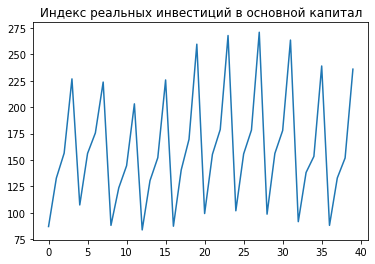

In [7]:
plt.plot(df["Индекс реальных инвестиций в основной капитал"]) #X
plt.title("Индекс реальных инвестиций в основной капитал")
plt.show()

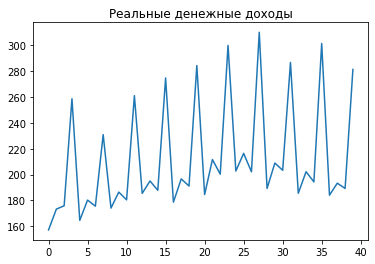

In [8]:
plt.plot(df["Реальные денежные доходы"]) #Y
plt.title("Реальные денежные доходы")
plt.show()

# Анализ линейной модели

In [9]:
y = df["Реальные денежные доходы"]
x = df["Индекс реальных инвестиций в основной капитал"]

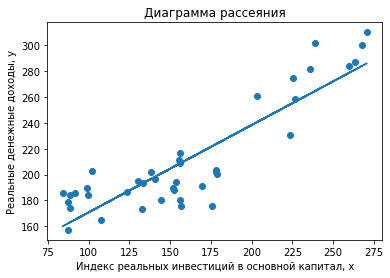

In [10]:
plt.scatter(x, y)
plt.title('Диаграмма рассеяния')
plt.xlabel('Индекс реальных инвестиций в основной капитал, x')
plt.ylabel('Реальные денежные доходы, y')

z = np.polyfit(x, y, 1) #расчет линии тренда
p = np.poly1d(z)

plt.plot(x, p(x));

Вывод: тренд восходящий линейная зависимость между переменными есть

In [11]:
Corr_x_y = np.corrcoef(x,y)[0][1]
Corr_x_y

0.8852042970970887

Вывод: зависимость прямая, степень тесноты высокая

In [12]:
X = sm.add_constant(x)
model = sm.OLS(y, X, hasconst = True).fit()

print(model.summary2(title = 'Линейная модель'))

                                        Линейная модель
Model:                      OLS                             Adj. R-squared:            0.778   
Dependent Variable:         Реальные денежные доходы        AIC:                       355.7228
Date:                       2024-02-12 22:14                BIC:                       359.1005
No. Observations:           40                              Log-Likelihood:            -175.86 
Df Model:                   1                               F-statistic:               137.6   
Df Residuals:               38                              Prob (F-statistic):        3.39e-14
R-squared:                  0.784                           Scale:                     406.05  
-----------------------------------------------------------------------------------------------
                                               Coef.   Std.Err.    t    P>|t|   [0.025  0.975] 
--------------------------------------------------------------------------------

In [13]:
model.scale**0.5 #Стандартная ошибка

20.15077829383082

Уравнение регрессии:

$y_i = b_0 + b_1 * x_i + \varepsilon_i$

$y_i = 103.1716 + 0.6757 * x_1 + \varepsilon_i \\
\sigma = 20.1508 \\
\sigma_{b_0} = 9.767 \\
\sigma_{b_1} = 0.058
$

###### Оценка значимости пар-ов ур-я по критерию Стьюдента

In [14]:
t_cr = sts.t(model.df_resid).isf(0.05/2)
t_cr

2.0243941645751367

In [15]:
for x_name, t in model.tvalues.items():
    print(f't расч: {round(abs(t),4)}')
    if t_cr < abs(t):
        print(f'Коэффициент: {x_name} по критерию Стьюдента статистически значим')
    else:
        print(f'Коэффициент: {x_name} по критерию Стьюдента статистически не значим')

t расч: 10.5631
Коэффициент: const по критерию Стьюдента статистически значим
t расч: 11.7299
Коэффициент: Индекс реальных инвестиций в основной капитал по критерию Стьюдента статистически значим


###### Оценка значимости ур-я регрессии по критерию Фишера

In [16]:
F_cr = sts.f(model.df_model, model.df_resid).isf(0.05)
F_cr

4.098171730880841

In [17]:
print(f'Fрасч {round(model.fvalue,4)}')

if model.fvalue > F_cr:
    print('По критерию Фишера, уравнение регрессии статистически значимо')

Fрасч 137.5899
По критерию Фишера, уравнение регрессии статистически значимо


###### Оценка точности модели

In [18]:
remains = model.resid.to_numpy()
remains

array([ -4.92764428, -19.77607971, -33.12330846,   2.34044334,
       -11.31253692, -28.52058945, -46.32975206, -23.43236657,
        11.22905269,  -0.35936343, -20.48212108,  20.68767208,
        25.53469183,   3.64567236, -18.21766932,  19.11617337,
        16.36963672,  -1.57920096, -26.67537187,   5.87649831,
        14.16087634,   3.41999458, -23.69208816,  15.93551205,
        30.60397826,   7.94970257, -21.55422314,  24.04074895,
        19.26631436,   0.17941055, -20.08393113,   5.64115118,
        20.36399758,   5.64255112, -12.52854536,  36.89653695,
        21.22905269,   0.25634728, -16.61495031,  18.82372705])

In [19]:
yi_real = y.to_numpy().reshape(-1)
yi_real

array([157.1, 173.2, 175.8, 258.7, 164.5, 180.2, 175.5, 230.9, 174. ,
       186.4, 180.4, 261.1, 185.4, 195. , 187.8, 274.8, 178.6, 196.6,
       191.1, 284.4, 184.5, 211.6, 200.3, 300. , 202.7, 216.4, 202.1,
       310.2, 189.2, 208.9, 203.3, 286.8, 185.5, 202.2, 194.3, 301.5,
       184. , 193.3, 189.2, 281.4])

In [20]:
mean_error_approx = (sum(abs(remains/yi_real))/len(remains))*100
print(f'{round(mean_error_approx,4)}%')

8.0774%


меньше 10, значит точность модели высокая

###### Вывод: оценивание качества модели показало, что качество полученного уравнения регрессии высокое

# Анализ полулогарифмической модели

In [21]:
ln_y = y.map(np.log)
ln_y.head()

0    5.056883
1    5.154447
2    5.169347
3    5.555669
4    5.102911
Name: Реальные денежные доходы, dtype: float64

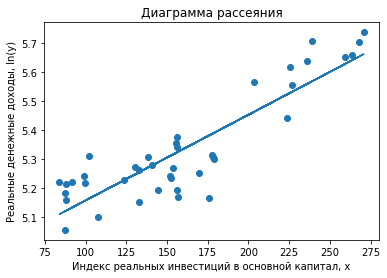

In [22]:
plt.scatter(x, ln_y)
plt.title('Диаграмма рассеяния')
plt.xlabel('Индекс реальных инвестиций в основной капитал, x')
plt.ylabel('Реальные денежные доходы, ln(y)')

z = np.polyfit(x, ln_y, 1) #расчет линии тренда
p = np.poly1d(z)

plt.plot(x, p(x));

Вывод: тренд восходящий линейная зависимость между переменными есть

In [23]:
Corr_x_y = np.corrcoef(x,ln_y)[0][1]
Corr_x_y

0.8845838759585943

Вывод: зависимость прямая, степень тесноты высокая

In [24]:
X = sm.add_constant(x)
ln_model = sm.OLS(ln_y, X, hasconst = True).fit()

print(ln_model.summary2(title = 'Полулогарифмическая модель'))

                                Полулогарифмическая модель
Model:                     OLS                           Adj. R-squared:          0.777    
Dependent Variable:        Реальные денежные доходы      AIC:                     -78.7898 
Date:                      2024-02-12 22:18              BIC:                     -75.4120 
No. Observations:          40                            Log-Likelihood:          41.395   
Df Model:                  1                             F-statistic:             136.7    
Df Residuals:              38                            Prob (F-statistic):      3.73e-14 
R-squared:                 0.782                         Scale:                   0.0077790
-------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------------------
const                

In [26]:
ln_model.scale**0.5

0.08819861688469517

Уравнение регрессии:

$ln{y_i} = b_0 + b_1 * x_i + ln{\varepsilon_i}$

$ln{y_i} = 4.8637 + 0.0029 * x_1 + ln{\varepsilon_i} \\
\sigma = 0.0882 \\
\sigma_{b_0} = 0.043 \\
\sigma_{b_1} = 0.0003
$

###### Оценка значимости пар-ов ур-я по критерию Стьюдента

In [27]:
t_cr = sts.t(ln_model.df_resid).isf(0.05/2)
t_cr

2.0243941645751367

In [28]:
for x_name, t in ln_model.tvalues.items():
    print(f't расч: {round(abs(t),4)}')
    if t_cr < abs(t):
        print(f'Коэффициент: {x_name} по критерию Стьюдента статистически значим')
    else:
        print(f'Коэффициент: {x_name} по критерию Стьюдента статистически не значим')

t расч: 113.7696
Коэффициент: const по критерию Стьюдента статистически значим
t расч: 11.692
Коэффициент: Индекс реальных инвестиций в основной капитал по критерию Стьюдента статистически значим


###### Оценка значимости ур-я регрессии по критерию Фишера

In [29]:
F_cr = sts.f(ln_model.df_model, ln_model.df_resid).isf(0.05)
F_cr

4.098171730880841

In [30]:
print(f'Fрасч {round(ln_model.fvalue,4)}')

if ln_model.fvalue > F_cr:
    print('По критерию Фишера, уравнение регрессии статистически значимо')

Fрасч 136.7035
По критерию Фишера, уравнение регрессии статистически значимо


###### Оценка точности модели

In [31]:
remains = ln_model.resid.to_numpy()
ln_yi_real = ln_y.to_numpy().reshape(-1)
mean_error_approx = (sum(abs(remains / ln_yi_real))/len(remains))*100
print(f'{round(mean_error_approx,4)}%')

1.3803%


меньше 10, значит точность модели высокая

###### Вывод: оценивание качества модели показало, что качество полученного уравнения регрессии высокое

# Сравнение линейной и полулогарифмической моделей

## Метод Зарембки

H0 - Модели не имеют статистически значимых различий

H1 - Модели имеют статистически значимые различия

In [32]:
y_gm = sts.gmean(y)
y_gm

207.71962401469497

In [33]:
y_star = y/y_gm
y_star.head()

0    0.756308
1    0.833816
2    0.846333
3    1.245429
4    0.791933
Name: Реальные денежные доходы, dtype: float64

In [34]:
model_star = sm.OLS(y_star, X).fit()

print(model_star.summary2())

                             Results: Ordinary least squares
Model:                    OLS                           Adj. R-squared:          0.778    
Dependent Variable:       Реальные денежные доходы      AIC:                     -71.1724 
Date:                     2024-02-12 22:18              BIC:                     -67.7946 
No. Observations:         40                            Log-Likelihood:          37.586   
Df Model:                 1                             F-statistic:             137.6    
Df Residuals:             38                            Prob (F-statistic):      3.39e-14 
R-squared:                0.784                         Scale:                   0.0094108
------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
const                        

In [35]:
ESS1 = model_star.ssr
ESS1

0.35761208811358874

In [36]:
ln_y_star = y_star.map(np.log)
ln_model_star = sm.OLS(ln_y_star, X).fit()

print(ln_model_star.summary2())

                               Results: Ordinary least squares
Model:                      OLS                            Adj. R-squared:           0.777    
Dependent Variable:         Реальные денежные доходы       AIC:                      -78.7898 
Date:                       2024-02-12 22:18               BIC:                      -75.4120 
No. Observations:           40                             Log-Likelihood:           41.395   
Df Model:                   1                              F-statistic:              136.7    
Df Residuals:               38                             Prob (F-statistic):       3.73e-14 
R-squared:                  0.782                          Scale:                    0.0077790
----------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------

In [37]:
ESS2 = ln_model_star.ssr
ESS2

0.295601848774183

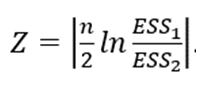

In [38]:
n = len(y)
Z = abs(n/2 * np.log(ESS1/ESS2))
Z

3.8087080562536486

In [39]:
chi2_cr = sts.chi2(1).isf(0.05)
chi2_cr

3.8414588206941285

In [40]:
if Z < chi2_cr:
    print("H0 не отклоняется")
else:
    print("H0 отклоняется")

H0 не отклоняется


###### Вывод: исходя из метода Зарембки, выбираем линейную модель

## Тест Бокса - Кокса

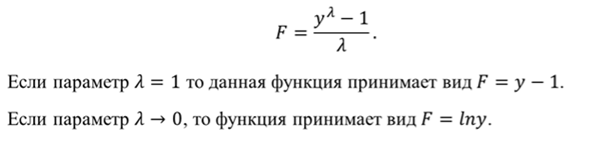
H0: λ = 1. Модель является линейной

H1: λ → 0. Модель является полулогарифмической

In [41]:
y_star.head()

0    0.756308
1    0.833816
2    0.846333
3    1.245429
4    0.791933
Name: Реальные денежные доходы, dtype: float64

In [43]:
ESS_min = np.inf

for lambd in np.arange(0.0001, 1, 0.0001):
    y_B_C = y_star**lambd / lambd
    X_B_C = X**lambd / lambd
    model_B_C = sm.OLS(y_B_C, X_B_C).fit()
    ESS = model_B_C.ssr
    
    if ESS_min > ESS:
        ESS_min = ESS
        lambd_min = lambd
        min_model_B_C = model_B_C
        
print(lambd_min)

0.9999


Минимальный ESS при  λ = 0.9999, значит берем λ = 1. H0 не отклоняется

In [44]:
print(min_model_B_C.summary2())

                             Results: Ordinary least squares
Model:                    OLS                           Adj. R-squared:          0.778    
Dependent Variable:       Реальные денежные доходы      AIC:                     -71.1716 
Date:                     2024-02-12 22:22              BIC:                     -67.7938 
No. Observations:         40                            Log-Likelihood:          37.586   
Df Model:                 1                             F-statistic:             137.6    
Df Residuals:             38                            Prob (F-statistic):      3.39e-14 
R-squared:                0.784                         Scale:                   0.0094110
------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
const                        

###### Вывод: исходя из теста Бокса-Кокса, выбираем линейную модель

## Критерий Акаике и критерий Шварца

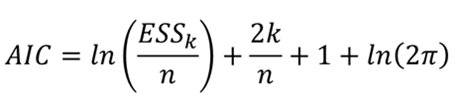

In [45]:
n = len(y)
k = 1
ESS1 = model.ssr
ESS2 = ln_model.ssr

AIC_lin = np.log(ESS1/n) + (2*k)/n + 1 + np.log(2*np.pi)
AIC_log = np.log(ESS2/n) + (2*k)/n + 1 + np.log(2*np.pi)
AIC_lin, AIC_log

(8.843069597323348, -2.0197442233217426)

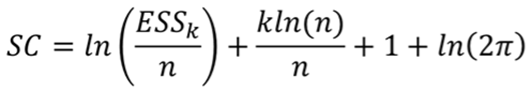

In [46]:
SC_lin = np.log(ESS1/n) + (np.log(n)*k)/n + 1 + np.log(2*np.pi)
SC_log = np.log(ESS2/n) + (np.log(n)*k)/n + 1 + np.log(2*np.pi)

SC_lin, SC_log

(8.885291583676196, -1.9775222369688938)

###### Вывод: данные критерии не применимы к задаче выбора между линейной или полулогарифмической моделями.

Данные критерии применимы к задаче выбора оптимального количества регрессоров в модели

В данной модели только один регрессор, значит применять данные критерии нецелесообразно

## Тест Бера и МакАлера

H0: Модель являетя полулогарифмической

H1: Модель являетя линейной

In [47]:
ln_y_pred = np.log(model.predict())
exp_ln_y_pred = np.exp(ln_model.predict())
exp_help_model = sm.OLS(exp_ln_y_pred, X).fit()
print(exp_help_model.summary2())

                                Results: Ordinary least squares
Model:                         OLS                        Adj. R-squared:               0.993   
Dependent Variable:            y                          AIC:                          202.5339
Date:                          2024-02-12 22:23           BIC:                          205.9116
No. Observations:              40                         Log-Likelihood:               -99.267 
Df Model:                      1                          F-statistic:                  5735.   
Df Residuals:                  38                         Prob (F-statistic):           4.57e-43
R-squared:                     0.993                      Scale:                        8.8177  
------------------------------------------------------------------------------------------------
                                               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------

In [49]:
ln_help_model = sm.OLS(ln_y_pred, X).fit()
print(ln_help_model.summary2())

                              Results: Ordinary least squares
Model:                      OLS                      Adj. R-squared:             0.992     
Dependent Variable:         y                        AIC:                        -217.5044 
Date:                       2024-02-12 22:23         BIC:                        -214.1267 
No. Observations:           40                       Log-Likelihood:             110.75    
Df Model:                   1                        F-statistic:                4932.     
Df Residuals:               38                       Prob (F-statistic):         7.87e-42  
R-squared:                  0.992                    Scale:                      0.00024258
-------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------------------
const             

In [50]:
exp_up = exp_help_model.resid
ln_up = ln_help_model.resid

X_exp_up = pd.concat([X, exp_up], axis=1).rename(columns={0:'upsilon_1'})
X_ln_up = pd.concat([X, ln_up], axis=1).rename(columns={0:'upsilon_2'})
X_exp_up.head()

,const,Индекс реальных инвестиций в основной капитал,upsilon_1
0,1.0,87.1,3.887667
1,1.0,132.9,-1.354458
2,1.0,156.5,-2.720066
3,1.0,226.7,-0.617932
4,1.0,107.5,1.150286


In [51]:
X_ln_up.head()

,const,Индекс реальных инвестиций в основной капитал,upsilon_2
0,1.0,87.1,-0.022299
1,1.0,132.9,0.009287
2,1.0,156.5,0.014892
3,1.0,226.7,-0.000005
4,1.0,107.5,-0.004437


In [52]:
ln_model_new = sm.OLS(ln_y, X_exp_up).fit()
print(ln_model_new.summary2())

                              Results: Ordinary least squares
Model:                     OLS                           Adj. R-squared:          0.841    
Dependent Variable:        Реальные денежные доходы      AIC:                     -91.5553 
Date:                      2024-02-12 22:23              BIC:                     -86.4887 
No. Observations:          40                            Log-Likelihood:          48.778   
Df Model:                  2                             F-statistic:             104.5    
Df Residuals:              37                            Prob (F-statistic):      5.99e-16 
R-squared:                 0.850                         Scale:                   0.0055232
-------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
-------------------------------------------------------------------------------------------
const             

In [53]:
model_new = sm.OLS(y, X_ln_up).fit()
print(model_new.summary2())

                                  Results: Ordinary least squares
Model:                       OLS                               Adj. R-squared:              0.872   
Dependent Variable:          Реальные денежные доходы          AIC:                         334.6616
Date:                        2024-02-12 22:23                  BIC:                         339.7283
No. Observations:            40                                Log-Likelihood:              -164.33 
Df Model:                    2                                 F-statistic:                 133.6   
Df Residuals:                37                                Prob (F-statistic):          1.18e-17
R-squared:                   0.878                             Scale:                       234.31  
----------------------------------------------------------------------------------------------------
                                                Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------

In [54]:
t_cr = sts.t(n-3).isf(0.05/2)
t_cr

2.0261924630291097

In [55]:
t_theta_1_lin = abs(ln_model_new.tvalues.iloc[2])
t_theta_2_log = abs(model_new.tvalues.iloc[2])
t_theta_1_lin, t_theta_2_log

(4.064489817667345, 5.371634922712817)

In [56]:
if t_cr < t_theta_1_lin and t_cr > t_theta_2_log:
    print('H0 отклоняется. Выбираем линейную модель')
elif t_cr > t_theta_1_lin and t_cr < t_theta_2_log:
    print('H0 не отклоняется. Выбираем полулогарифмическую модель')
else:
    print('Нельзя определенно выбрать одну из моделей')

Нельзя определенно выбрать одну из моделей


###### Вывод: оба коэффициента θ1 и θ2 одновременно значимы, значит по тесту Бера и МакАлера нельзя определенно выбрать одну из моделей.

###### Вывод: т.к. нельзя определенно выбрать модель, то берем ту, которая проще, т.е линейную

## Тест МакКиннона, Уайта и Дэвидсона

H0: Модель являетя полулогарифмической

H1: Модель являетя линейной

In [60]:
new_X_for_ln_y = pd.concat([X, pd.Series(model.predict() - exp_ln_y_pred)], axis = 1).rename(columns={0:'y^ - exp(ln(y)^)'})
new_X_for_y = pd.concat((X, pd.Series(ln_y_pred - ln_model.predict())), axis = 1).rename(columns={0:'ln(y^) - ln(y)^'})

new_ln_y_model = sm.OLS(ln_y, new_X_for_ln_y).fit()

print(new_ln_y_model.summary2())

                               Results: Ordinary least squares
Model:                      OLS                            Adj. R-squared:           0.841    
Dependent Variable:         Реальные денежные доходы       AIC:                      -91.5553 
Date:                       2024-02-12 22:25               BIC:                      -86.4887 
No. Observations:           40                             Log-Likelihood:           48.778   
Df Model:                   2                              F-statistic:              104.5    
Df Residuals:               37                             Prob (F-statistic):       5.99e-16 
R-squared:                  0.850                          Scale:                    0.0055232
----------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------

In [61]:
new_y_model = sm.OLS(y, new_X_for_y).fit()
print(new_y_model.summary2())

                                  Results: Ordinary least squares
Model:                       OLS                               Adj. R-squared:              0.872   
Dependent Variable:          Реальные денежные доходы          AIC:                         334.6616
Date:                        2024-02-12 22:26                  BIC:                         339.7283
No. Observations:            40                                Log-Likelihood:              -164.33 
Df Model:                    2                                 F-statistic:                 133.6   
Df Residuals:                37                                Prob (F-statistic):          1.18e-17
R-squared:                   0.878                             Scale:                       234.31  
----------------------------------------------------------------------------------------------------
                                                Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------

In [62]:
t_cr = sts.t(n-3).isf(0.05/2)
t_cr

2.0261924630291097

In [63]:
t_gamma_1_lin = abs(new_ln_y_model.tvalues.iloc[2])
t_gamma_2_log = abs(new_y_model.tvalues.iloc[2])
t_gamma_1_lin, t_gamma_2_log

(4.064489817667359, 5.371634922712789)

In [64]:
if t_cr < t_gamma_1_lin and t_cr > t_gamma_2_log:
    print('H0 отклоняется. Выбираем линейную модель')
elif t_cr > t_gamma_1_lin and t_cr < t_gamma_2_log:
    print('H0 не отклоняется. Выбираем полулогарифмическую модель')
else:
    print('Нельзя определенно выбрать одну из моделей')

Нельзя определенно выбрать одну из моделей


###### Вывод: оба коэффициента γ1 и γ2 одновременно значимы, значит, исходя из теста МакКиннона, Уайта и Дэвидсона, нельзя определенно выбрать одну из моделей.

###### Т.к. нельзя определенно выбрать модель, то берем ту, которая проще, т.е линейную

# Выводы

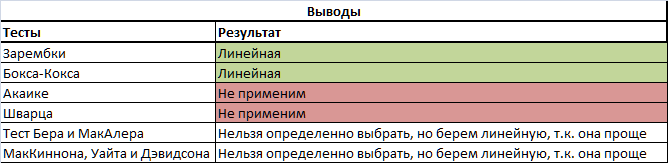

###### Вывод: применив все тесты, делаем вывод, что для нашего набора данных линейная модель подходит лучше, чем полулогарифмическая

# Условия применения

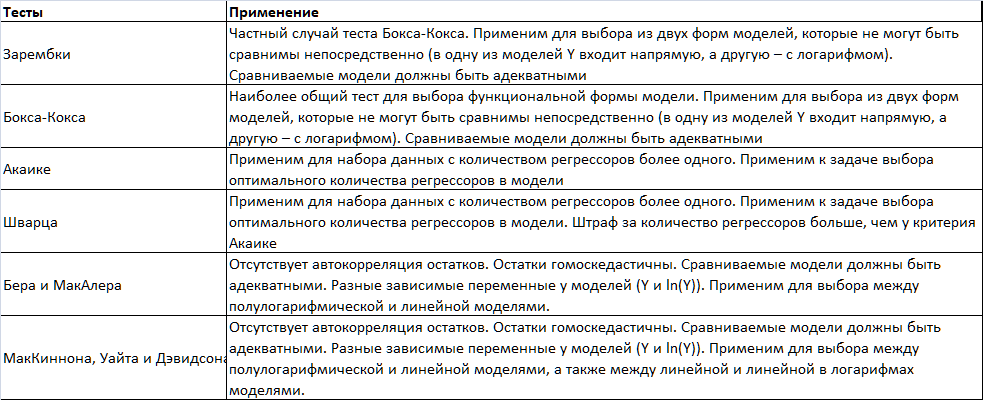